# Librerías


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# 1) Ejemplos básicos

--2021-09-14 14:53:06--  https://www.dropbox.com/s/1h2r6ykk0pw43ym/rice64.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1h2r6ykk0pw43ym/rice64.png [following]
--2021-09-14 14:53:06--  https://www.dropbox.com/s/raw/1h2r6ykk0pw43ym/rice64.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc782ceb207072a67dd8848a4e41.dl.dropboxusercontent.com/cd/0/inline/BWKRhr7SAlXuUCLc3a7YG2Yq3y27pHft_KEC5gGascw-RefweLOFHL_Ma_DqFgAe2dWPOyM6CxZZ2dtyTfbnlSRiuxWVzYg4KinRljsM5NqHCGobnm2h9nhOS8u9bqXoWByvFIKt_yA_oV9SZI6RyZXc/file# [following]
--2021-09-14 14:53:06--  https://uc782ceb207072a67dd8848a4e41.dl.dropboxusercontent.com/cd/0/inline/BWKRhr7SAlXuUCLc3a7YG2Yq3y27pHft_KEC5gGascw-RefweLOFHL_Ma_DqFgAe2dWPOyM6CxZZ2dtyTfbnlSRiuxWVzYg4

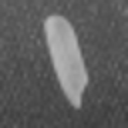

In [ ]:
!wget https://www.dropbox.com/s/1h2r6ykk0pw43ym/rice64.png
I = cv.imread('rice64.png',0)
cv2_imshow(I)

## 1.1) Máscara promedio (Filtro Pasa Bajos)

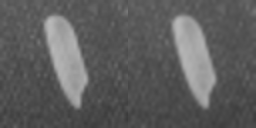

In [ ]:
n   = 3
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
Z = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

## 1.2) Máscara Gaussiana (Filtro Pasa Bajos)

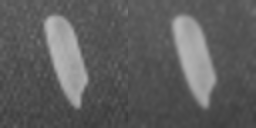

In [ ]:
kernel = cv.getGaussianKernel(11, 1.5)         # Gaussian 11 x 1  (11 = size, 1.5 = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian 11 x 11
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

## 1.2) Bordes horizontales

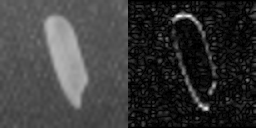

In [ ]:
Id = I.astype(float)

# 3x3 Y-direction  kernel
My = np.array([[ 0, -1,  0], [0, 0, 0], [0, 1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gy0 = cv.filter2D(Id, -1, My)

# Solo para visualización
Gy = np.abs(Gy0)
Gy = Gy/np.max(Gy)*255


Z = np.concatenate((Id,Gy),axis=1)
cv2_imshow(Z)


## 1.3) Bordes verticales

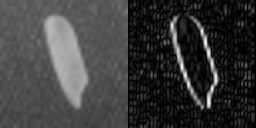

In [ ]:
Id = I.astype(float)

# 3 X 3 X-direction kernel
Mx = np.array([[ 0, 0, 0], [-1, 0, 1], [ 0, 0, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gx0 = cv.filter2D(Id, -1, Mx)

Gx = np.abs(Gx0)
Gx = Gx/np.max(Gx)*255

Z = np.concatenate((Id,Gx),axis=1)
cv2_imshow(Z)


## 1.4) Ambos bordes 

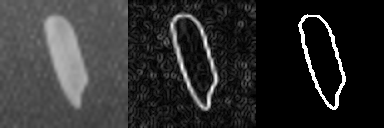

In [ ]:
G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
cv2_imshow(Z)

## 1.5) Sobel (detector de bordes)

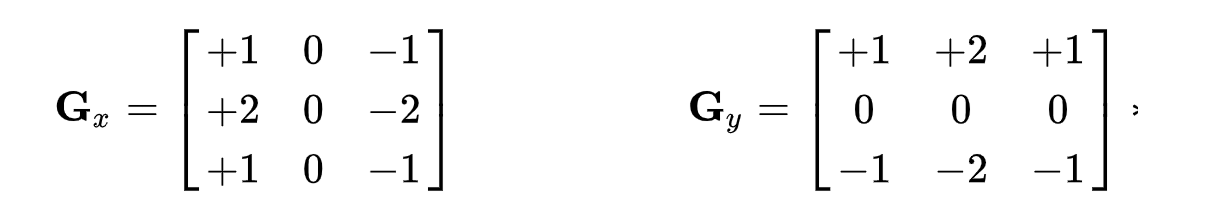

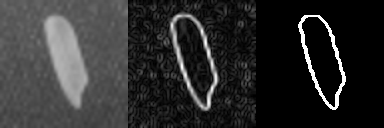

In [ ]:
Gx0 = cv.Sobel(Id,cv.CV_64F,1,0,ksize=3)
Gy0 = cv.Sobel(Id,cv.CV_64F,0,1,ksize=3)

G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = np.abs(G)
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
cv2_imshow(Z)

# 2) Filtro Pasa Altos

--2021-09-14 15:14:34--  https://www.dropbox.com/s/7dfgeyyl86mvhow/tokio_color.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7dfgeyyl86mvhow/tokio_color.jpg [following]
--2021-09-14 15:14:34--  https://www.dropbox.com/s/raw/7dfgeyyl86mvhow/tokio_color.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc464683a313701caccb473b850b.dl.dropboxusercontent.com/cd/0/inline/BWKXQ79GkUZ5QO1YEEzqX_fYzjMq_nRulr6tG-0WrKt6-FS1ypy9pdr8UIMV90U6lyDvw8mO-w_zPW8uTmW4x00xe2XRwjY55Ystc3RFEvTHtTL8HTmKyKyEKa-lWbNoU-ISqOH5nGi2ehhe_s_ltjN4/file# [following]
--2021-09-14 15:14:34--  https://uc464683a313701caccb473b850b.dl.dropboxusercontent.com/cd/0/inline/BWKXQ79GkUZ5QO1YEEzqX_fYzjMq_nRulr6tG-0WrKt6-FS1ypy9pdr8UIMV90U6lyDvw8mO-w_zPW8uT

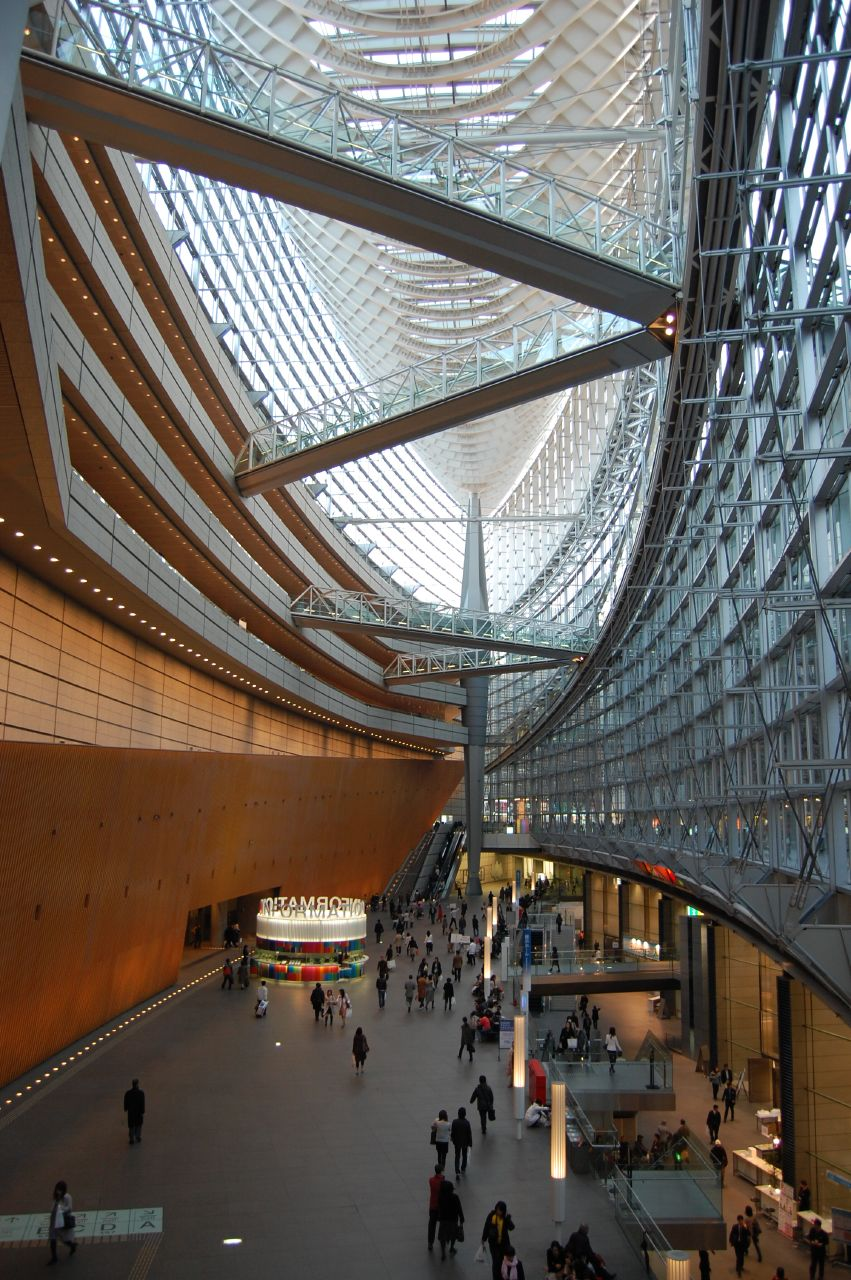

In [ ]:
# Lectura de imagen
!wget https://www.dropbox.com/s/7dfgeyyl86mvhow/tokio_color.jpg
Icv = cv.imread('tokio_color.jpg')
cv2_imshow(Icv)

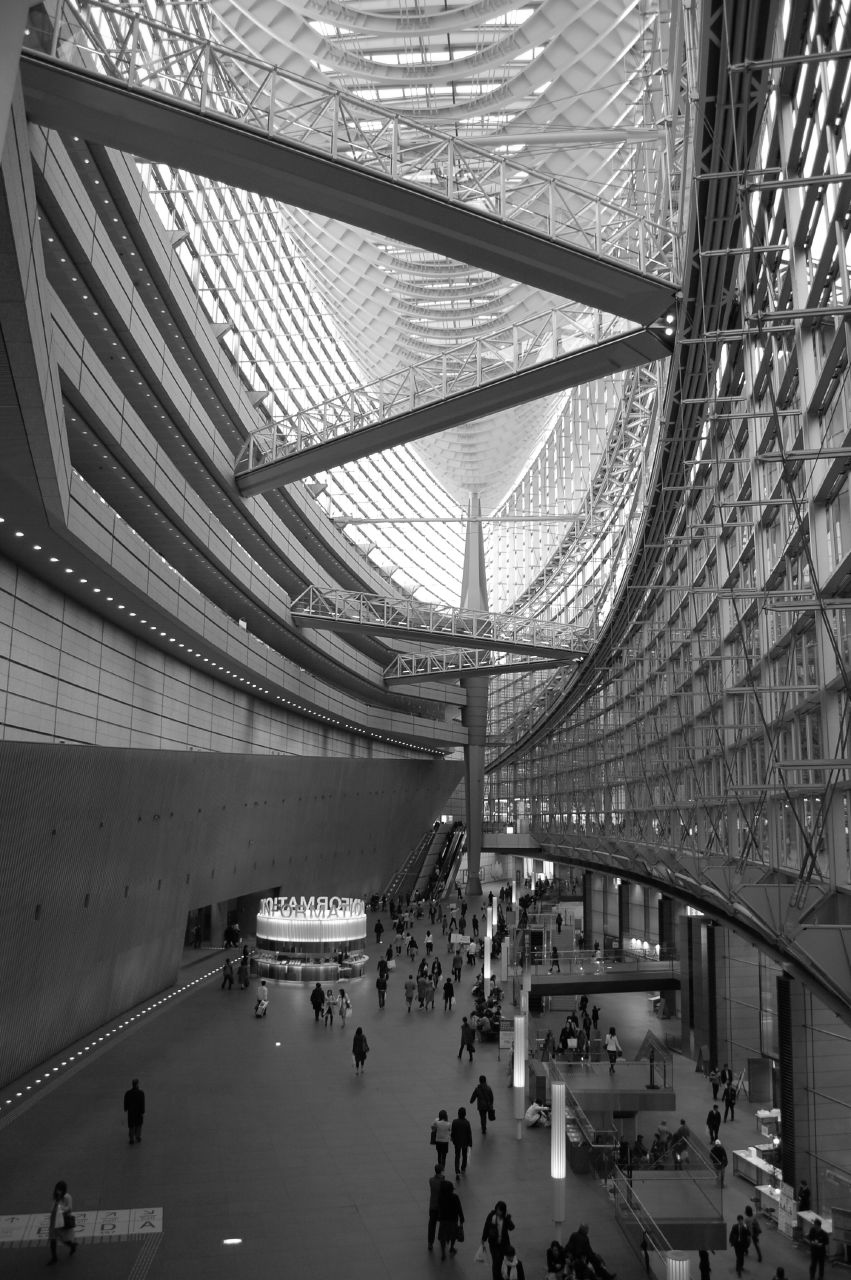

In [ ]:
# Conversión a gris
I = cv.cvtColor(Icv, cv.COLOR_BGR2GRAY)
cv2_imshow(I)

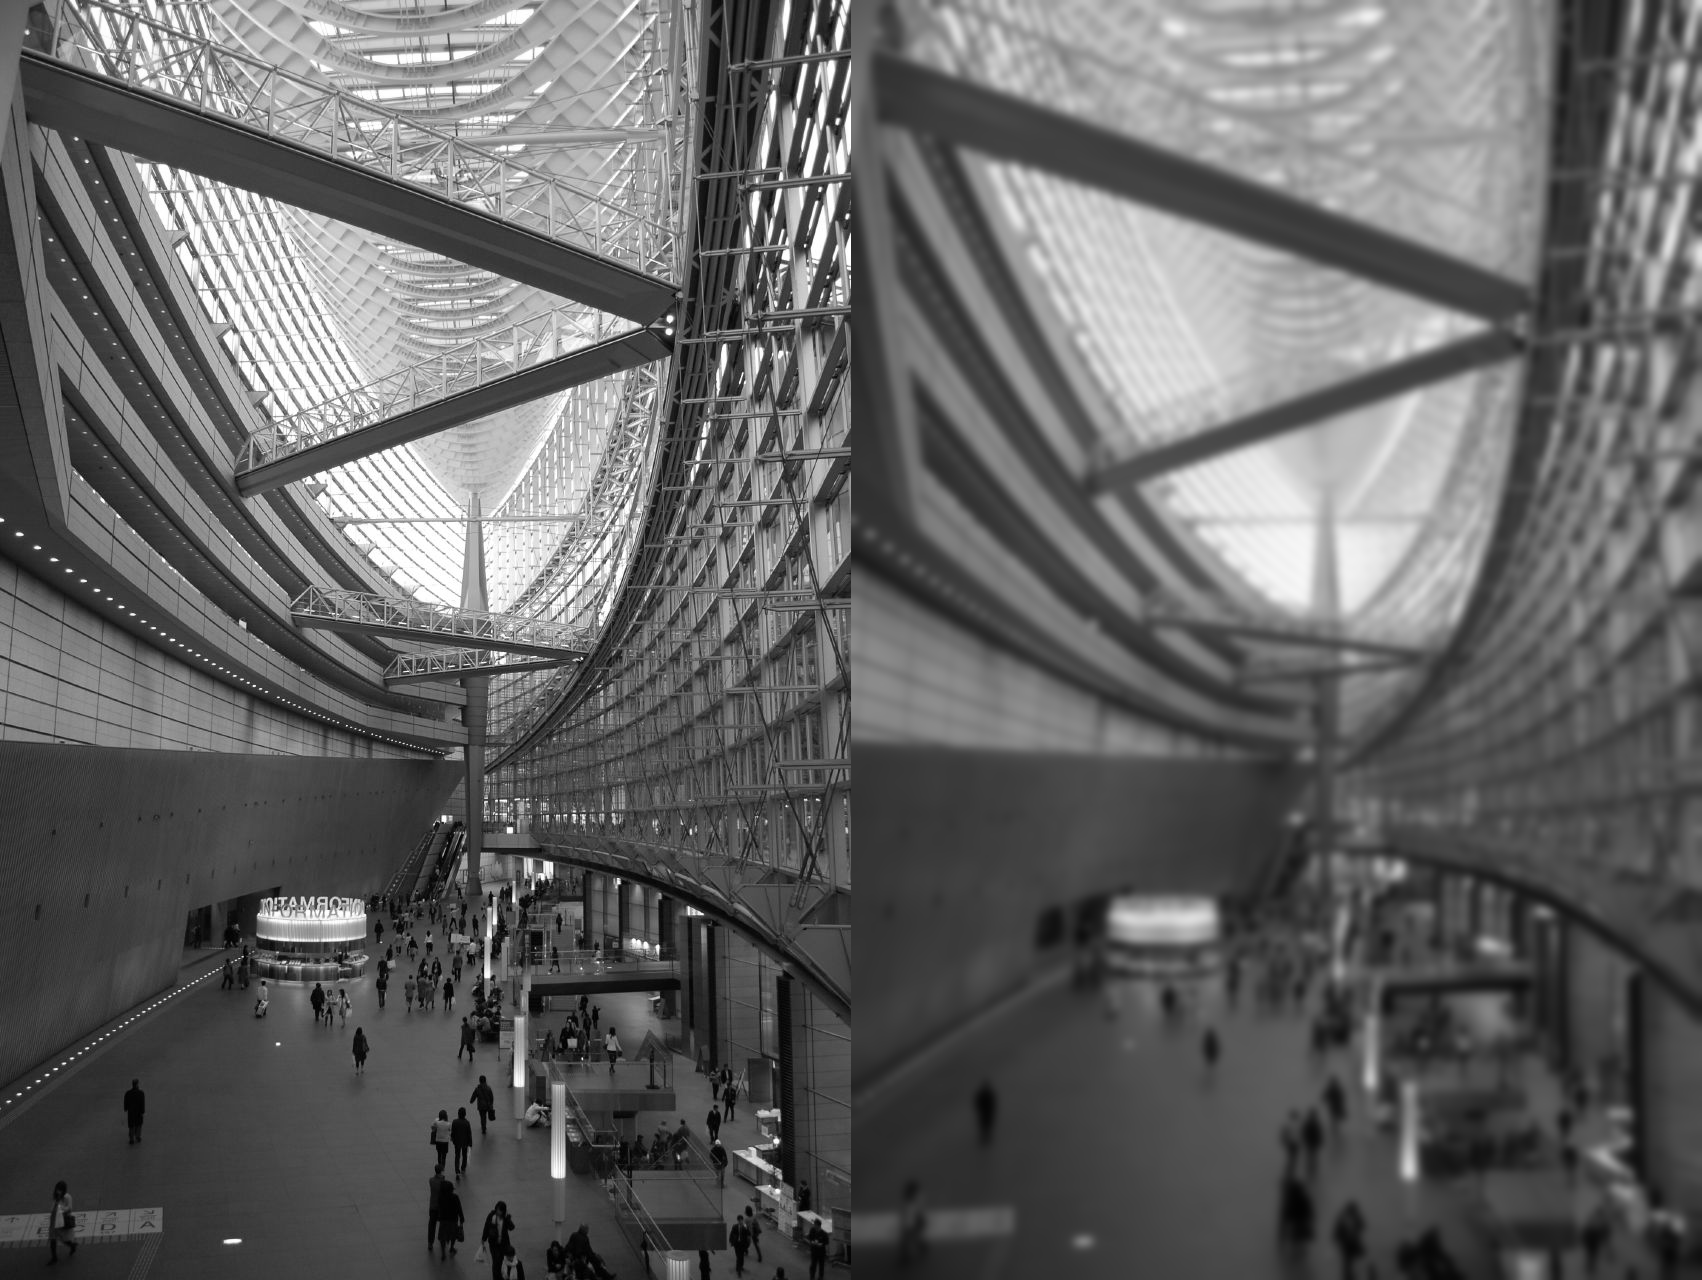

In [ ]:
# Filtro Gaussiano
s      = 39
kernel = cv.getGaussianKernel(s, s/8.5)        # Gaussian s x 1  (s = size, s/8.5 = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian s x s pixels
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

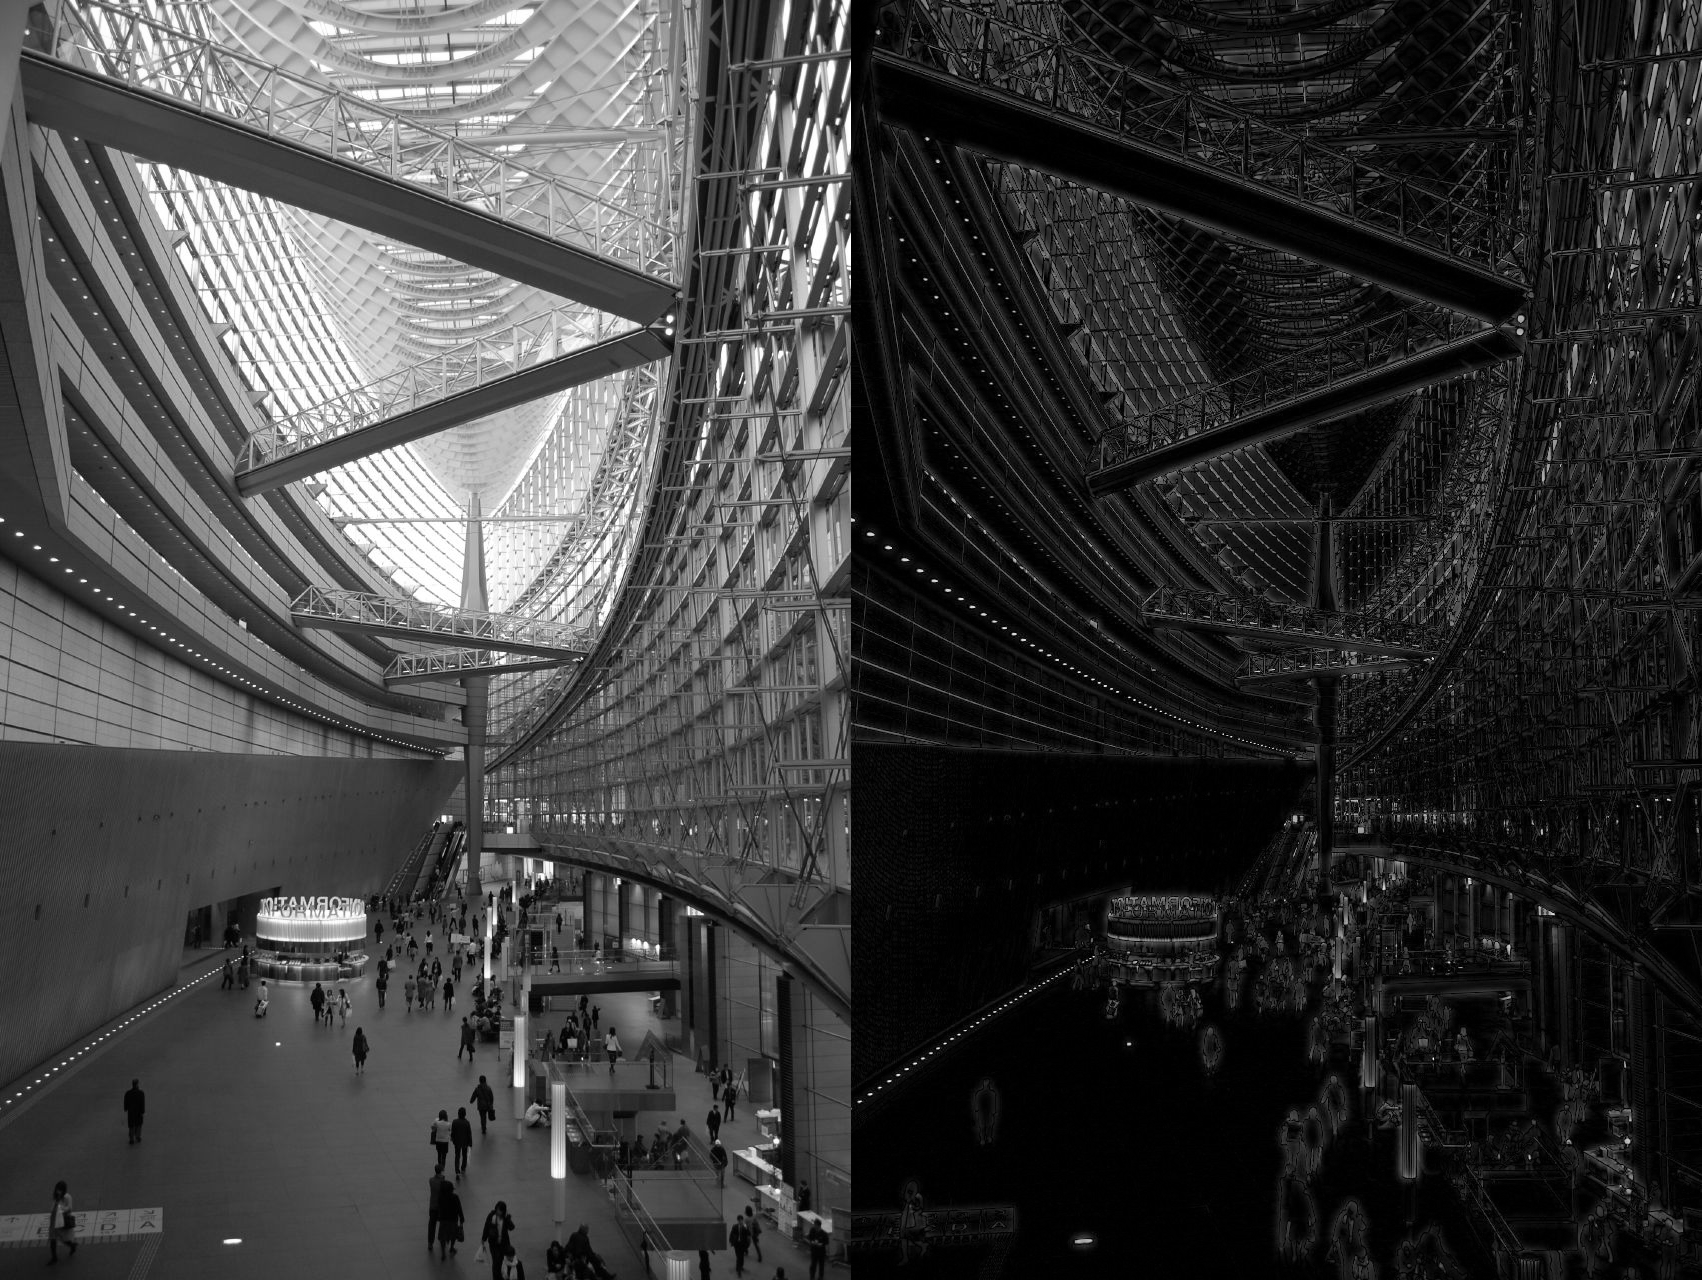

In [ ]:
# Pasa Altos
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

# Solo visualizacion
H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
Z = np.concatenate((I,H),axis=1)
cv2_imshow(Z)



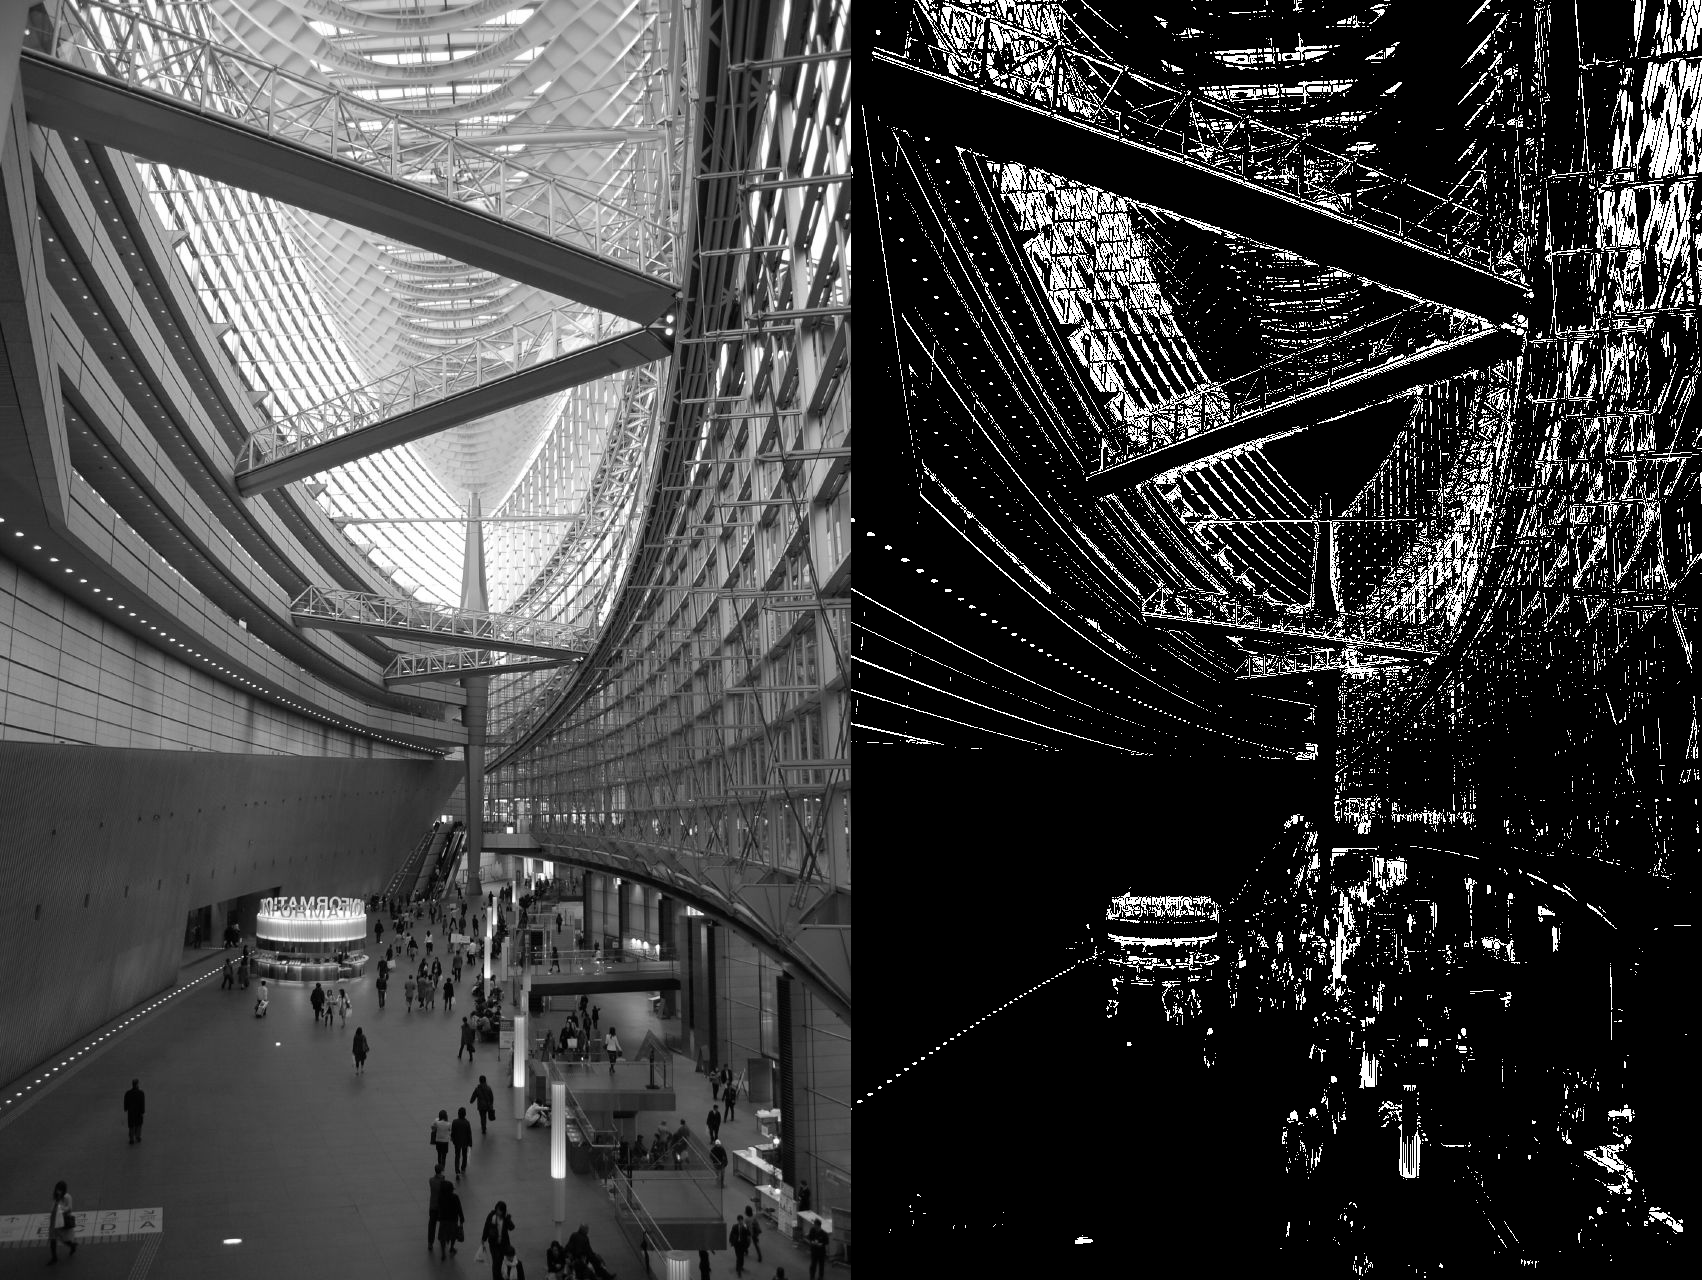

In [ ]:
# Detección de bordes
E = (H>50)*255
Z = np.concatenate((I,E),axis=1)
cv2_imshow(Z)



# 3) Filtro Agudizado

Resalta detalles

In [ ]:
!wget https://www.dropbox.com/s/c2bthdq3ymx5mg1/moon.tif

--2021-09-14 15:26:07--  https://www.dropbox.com/s/c2bthdq3ymx5mg1/moon.tif
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c2bthdq3ymx5mg1/moon.tif [following]
--2021-09-14 15:26:08--  https://www.dropbox.com/s/raw/c2bthdq3ymx5mg1/moon.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc188bbaa21ba12db5b412360e7e.dl.dropboxusercontent.com/cd/0/inline/BWK6ATXZH9XzU0zJFNROxZyh90OxWz1WjNnnGjm3HQmTPuTjPsUEOhQonWHUYR5-NHuc9O8Mk6bnERRKoYKy_liTAZa88dNs2uyfzu7_xeAoHp_tGBPA0poMA2IIn1ZVuApir_wDUqAShxbrK_IUrn32/file# [following]
--2021-09-14 15:26:08--  https://uc188bbaa21ba12db5b412360e7e.dl.dropboxusercontent.com/cd/0/inline/BWK6ATXZH9XzU0zJFNROxZyh90OxWz1WjNnnGjm3HQmTPuTjPsUEOhQonWHUYR5-NHuc9O8Mk6bnERRKoYKy_liTAZa88dNs2uyfzu

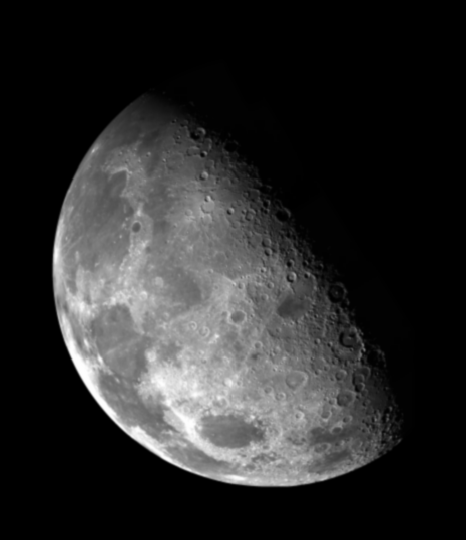

In [ ]:
# Imagen Original
I = cv.imread('moon.tif',0)
cv2_imshow(I)

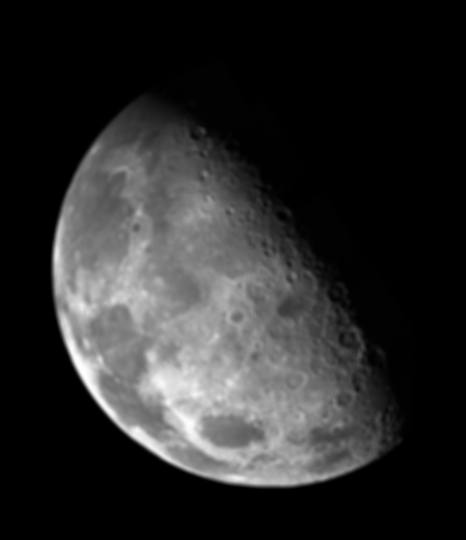

In [ ]:
# Imagen Filtrada (pasa bajos)
n   = 5
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
cv2_imshow(L)

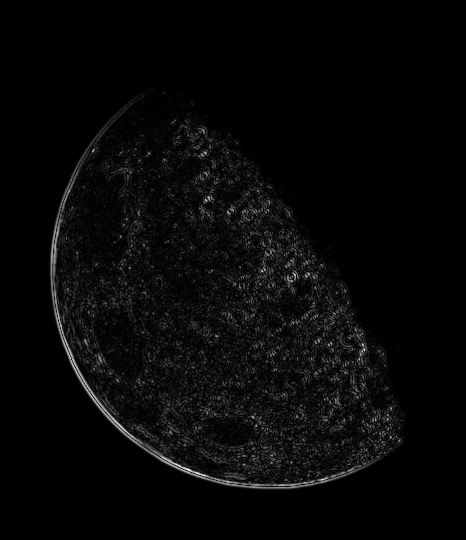

In [ ]:
# Pasa Altos
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
cv2_imshow(H)



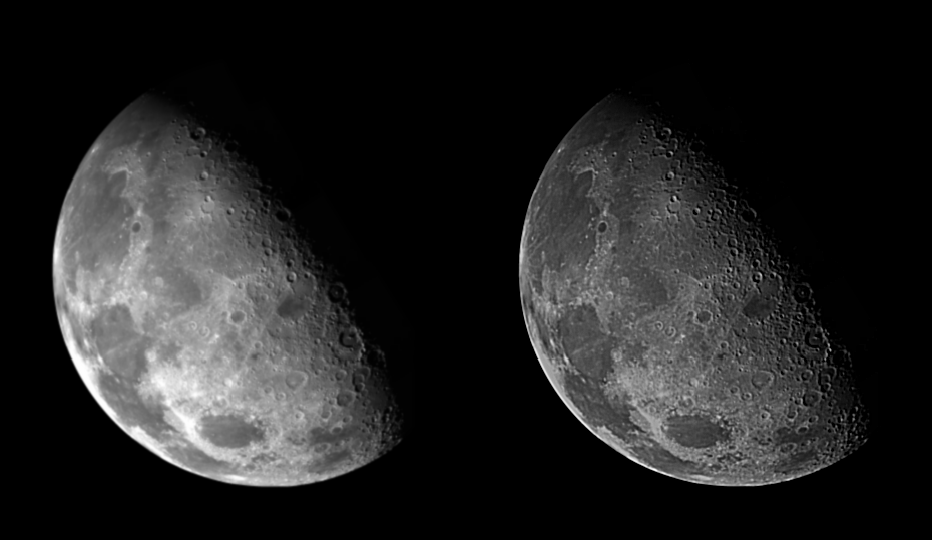

In [ ]:
# Agudizacion: se resaltan los pixeles del pasa altos
Jd = Id + 3*Hd

Jd[Jd<0] = 0
Jd = Jd/np.max(Jd)*255

Z = np.concatenate((Id,Jd),axis=1)

cv2_imshow(Z)